#### Scenario: 
An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

#### Goal: 
Given customer data they've collected, the company would like to determine whether they should focus their efforts on their mobile app experience or their website

#### Data:
The dataset provided (Ecommerce Customers.csv) contains string fields for customer infomation, such as Email, Address, and their color Avatar. Additionally, it contains numerical value columns per customer:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

There is also a numerical "Yearly Amount Spent" column, denoting how much a customer spent a year. This will serve as our target/output variable.

#### Approach:

* Visualize the data to identify any trends which stand out through observation
* Fit the data to a Linear Regression model in order to analyze the impact of the various input variables on the output of the yearly amount spent per customer

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

In [2]:
# Read in the data and validate it by checking the first few data instances
data = pd.read_csv('Ecommerce Customers')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
# Observe some key stats on the data (i.e. mean, standard deviation, etc.)
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
# Check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis:
Plot various views of the data to observe insights such as correlations, distributions, etc.

<AxesSubplot:xlabel='Time on App', ylabel='Yearly Amount Spent'>

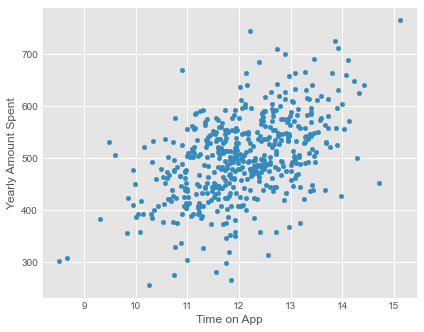

In [33]:
# Scatterplot 'Time on App' vs. 'Yearly Amount Spent' to check for any correlation
plt.style.use('ggplot')
data.plot.scatter(x='Time on App',y='Yearly Amount Spent',figsize=(6,5))

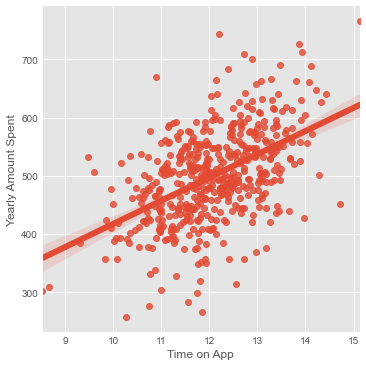

In [42]:
plt.style.use('ggplot')
sns.lmplot(x='Time on App',y='Yearly Amount Spent',data=data)

<AxesSubplot:xlabel='Time on Website', ylabel='Yearly Amount Spent'>

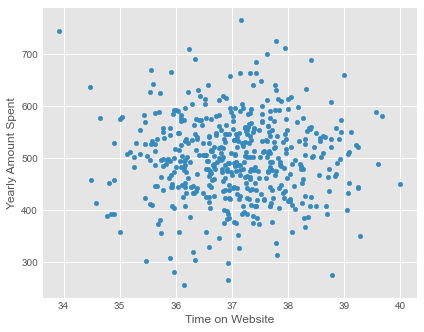

In [34]:
# Do the same for 'Time on Website' vs. 'Yearly Amount Spent'
data.plot.scatter(x='Time on Website',y='Yearly Amount Spent',figsize=(6,5))

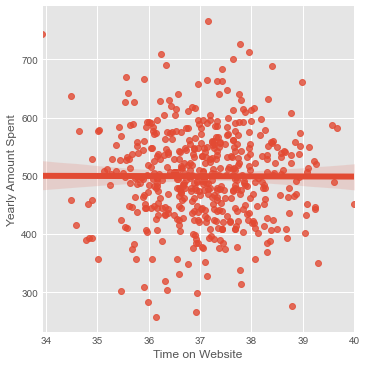

In [43]:
sns.lmplot(x='Time on Website',y='Yearly Amount Spent',data=data)

<AxesSubplot:>

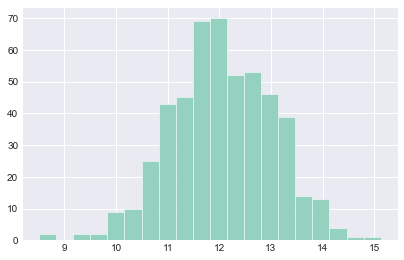

In [36]:
# Check the distribution of the 'Time on App'
sns.set_palette("GnBu_d")
sns.set_style('darkgrid')
data['Time on App'].hist(bins=20)

<AxesSubplot:>

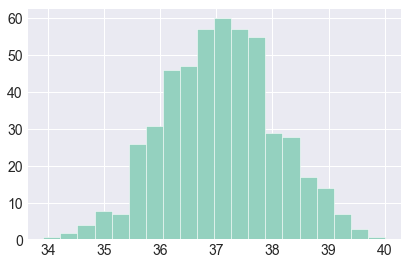

In [30]:
# Check the distribution of the 'Time on Website'
data['Time on Website'].hist(bins=20)

<AxesSubplot:>

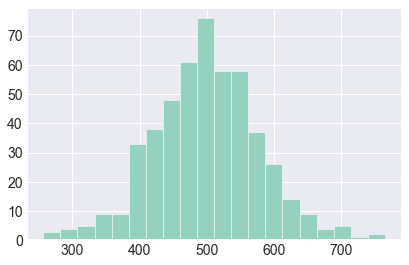

In [29]:
# Check the distribution of the 'Yearly Amount Spent'
data['Yearly Amount Spent'].hist(bins=20)

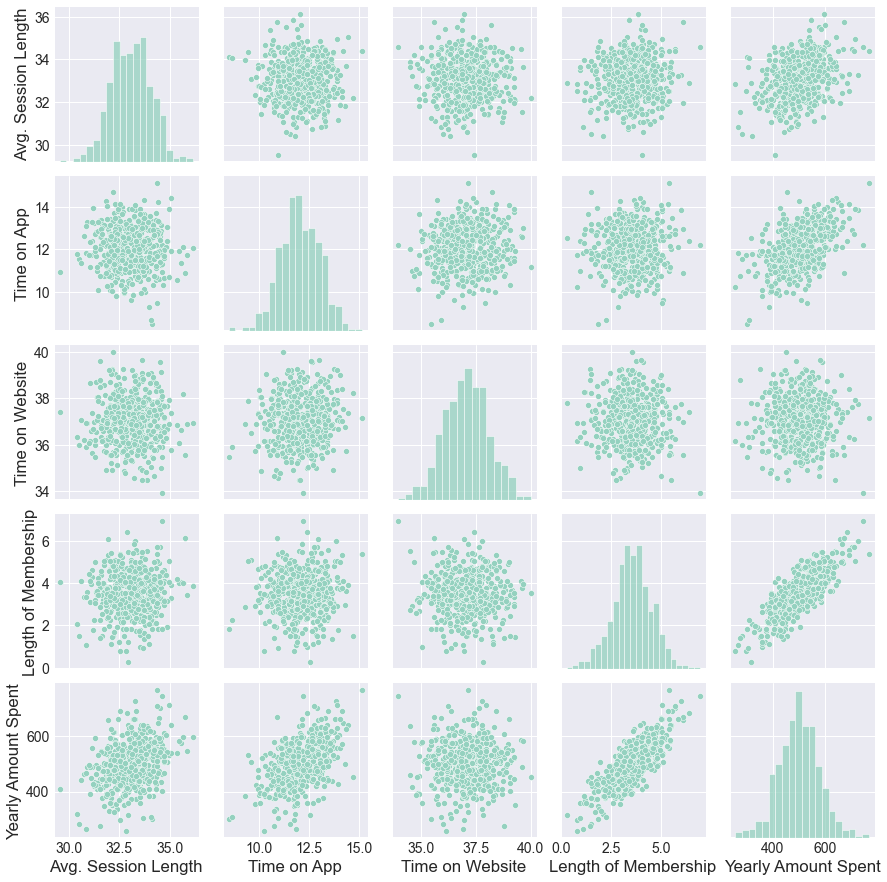

In [28]:
# Put out a pairplot to check for collinearity amongst rest of variables
sns.pairplot(data)

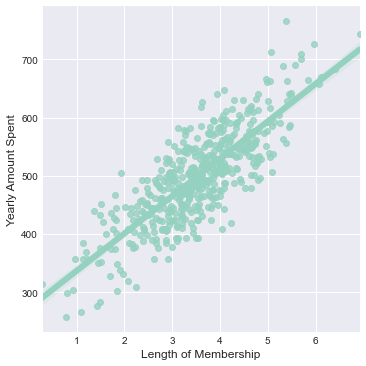

In [38]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

## Fit Linear Regression Model

Fitting a model and identifying the coefficients of the pertinent input variables could give insights into the business.

In [3]:
# Import the necessary libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
# Set up the data: X inputs and y outputs
X = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = data['Yearly Amount Spent']

In [14]:
# Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Set up the model and fit it with the training data
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [33]:
# Collect the coefficients of the input variables
coef = pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficients'])
coef

,Coefficients
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


## Analysis:
Based on the results of the coefficients, it appears that a user's time on the app has a stronger impact on the output score than their time on the website. Specifically, on average a 1 unit increase in the amount of time spent on the app corresponds to an increase of **\$38.60** spent a year by a user, while a 1 unit increase in the amount of time spent on the website corresponds to only **\$0.60** amount increase spent a year. The next steps would depend on the direction the company wants to take. If they are looking to keep their website an integral part of their business model, they should spend more time and investment in improving it. On the other hand, if it isn't something they would mind phasing out, they could choose to spend more time on their app.

Now let's further test out model by doing some predictions on it.

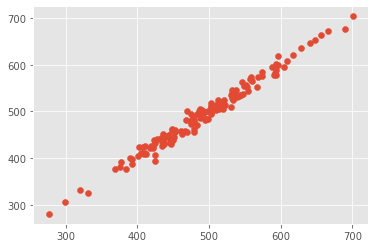

In [42]:
# Get the predictions of the test data set
# Plot them to observe correlation
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

In [43]:
from sklearn import metrics

In [44]:
# Compute the RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))

print('RMSE: {}'.format(rmse))

RMSE: 10.19389726086317
